In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.util import ngrams

In [ ]:
file_path = 'test_transactions0.1.xls'
category_column_name = 'Category'

# Using 'latin1' encoding as it's common for Excel-exported CSVs and handles a wider range of characters.
df = pd.read_excel(file_path)

print(f"Successfully loaded data from '{file_path}'.")
print("\nFirst 5 rows of the dataset:")
print(df.head())

Successfully loaded data from 'test_transactions0.1.xls'.

First 5 rows of the dataset:
        Date     Amount           Merchant         Category  \
0 2025-03-16   80814.70             UNICEF          Charity   
1 2025-03-16   61816.17   Bharat Petroleum             Fuel   
2 2025-03-16  110825.48           HDFC ATM  Cash Withdrawal   
3 2025-03-16   87042.87  Nature‚Äôs Basket        Groceries   
4 2025-03-16   16158.42    GenericMerchant    Miscellaneous   

                                         Description  
0  Donated  INR 80814.7 via UNICEF on 16-Mar-2025...  
1  Filled up at Bharat Petroleum on 16-Mar-2025 i...  
2  Withdrawn  INR 110825.48 from HDFC ATM ATM, Hy...  
3  A substantial shopping haul from Nature‚Äôs Ba...  
4  Paid  INR 16158.42 for a variety of small misc...  


In [ ]:
print(f"\nColumns in the dataset: {df.columns.tolist()}")

category_counts = df[category_column_name].value_counts()
category_percentages = df[category_column_name].value_counts(normalize=True) * 100

print(f"\n--- Distribution of Transaction Categories ({category_column_name}) ---")
print("Counts:")
print(category_counts)
print("\nPercentages:")
print(category_percentages.round(2))


Columns in the dataset: ['Date', 'Amount', 'Merchant', 'Category', 'Description']

--- Distribution of Transaction Categories (Category) ---
Counts:
Category
Investment         381
Dining             342
Insurance          323
Groceries          322
Healthcare         321
Miscellaneous      317
Education          317
Cash Withdrawal    315
Charity            313
Travel             313
Entertainment      305
Salary             302
Fuel               298
Taxes              293
Utilities          278
Shopping           260
Name: count, dtype: int64

Percentages:
Category
Investment         7.62
Dining             6.84
Insurance          6.46
Groceries          6.44
Healthcare         6.42
Miscellaneous      6.34
Education          6.34
Cash Withdrawal    6.30
Charity            6.26
Travel             6.26
Entertainment      6.10
Salary             6.04
Fuel               5.96
Taxes              5.86
Utilities          5.56
Shopping           5.20
Name: proportion, dtype: float64


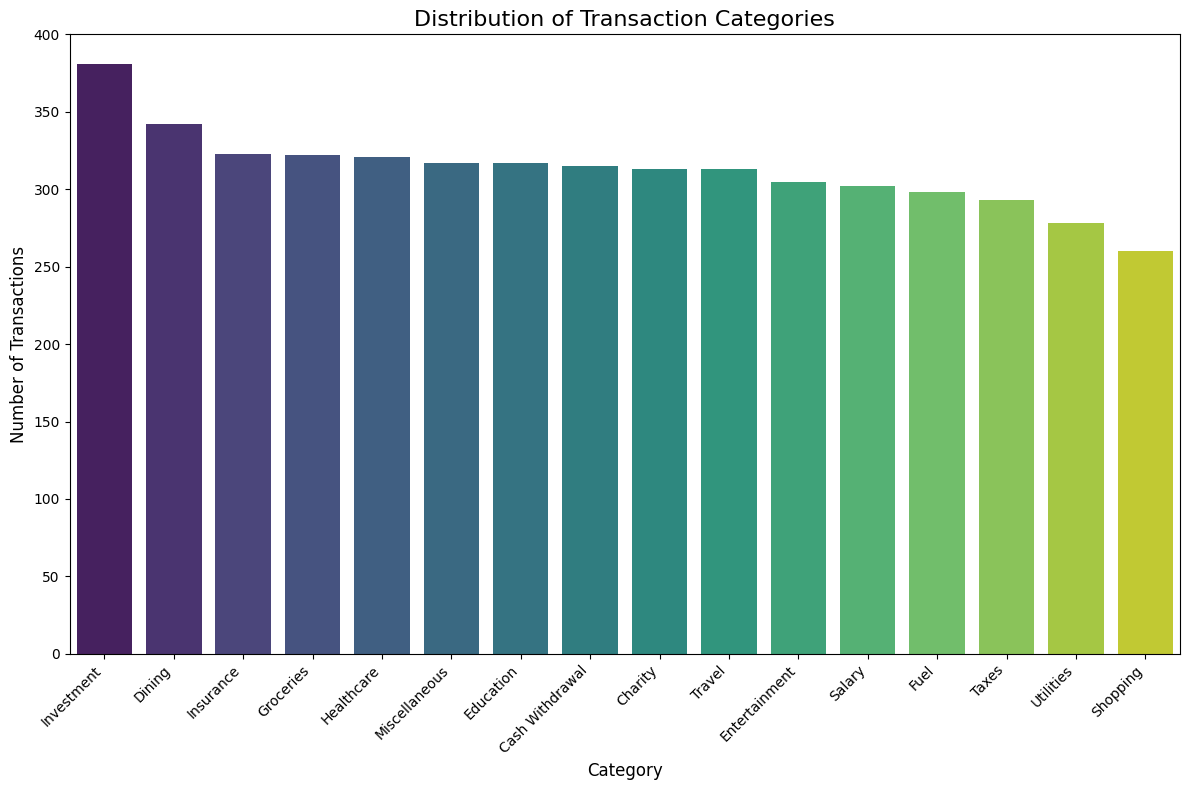

In [ ]:
# --- Visualization ---
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', hue=category_counts.index, legend=False)
plt.title('Distribution of Transaction Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

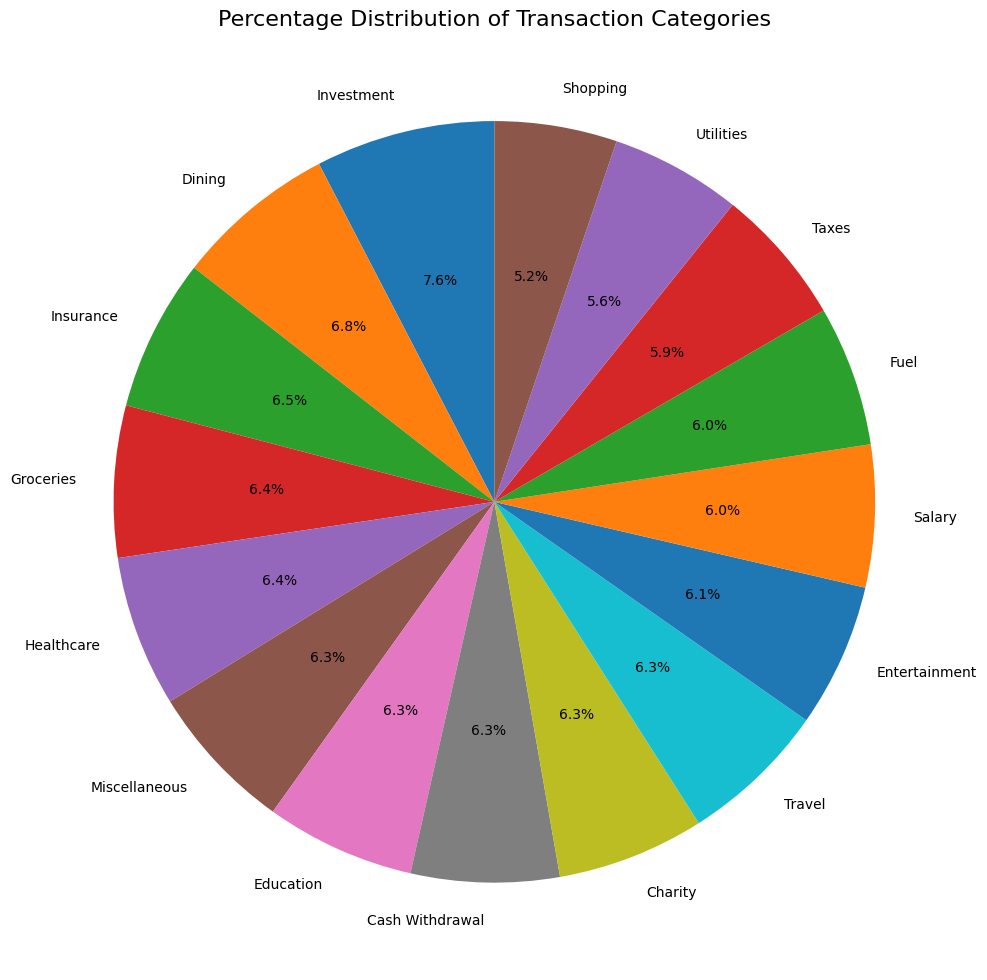

In [ ]:
# Optional: Pie chart for percentages (good for showing parts of a whole)
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Transaction Categories', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
date_column_name = 'Date'

df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')
# Drop rows where date conversion failed (if any)
df.dropna(subset=[date_column_name], inplace=True)
# Extract month and day of week
df['Month'] = df[date_column_name].dt.month_name()
df['DayOfWeek'] = df[date_column_name].dt.day_name()
df['IsWeekend'] = df[date_column_name].dt.dayofweek.isin([5, 6]) # Saturday (5) and Sunday (6)


In [ ]:
amount_column_name = 'Amount'
df[amount_column_name] = pd.to_numeric(df[amount_column_name], errors='coerce')
df.dropna(subset=[amount_column_name], inplace=True)



--- 4. Transaction Amount Distribution (Amount) ---

Descriptive Statistics for Amount:
count      5000.00
mean      74771.31
std       42731.09
min         570.51
25%       38036.88
50%       74803.36
75%      111925.08
max      149932.28
Name: Amount, dtype: float64


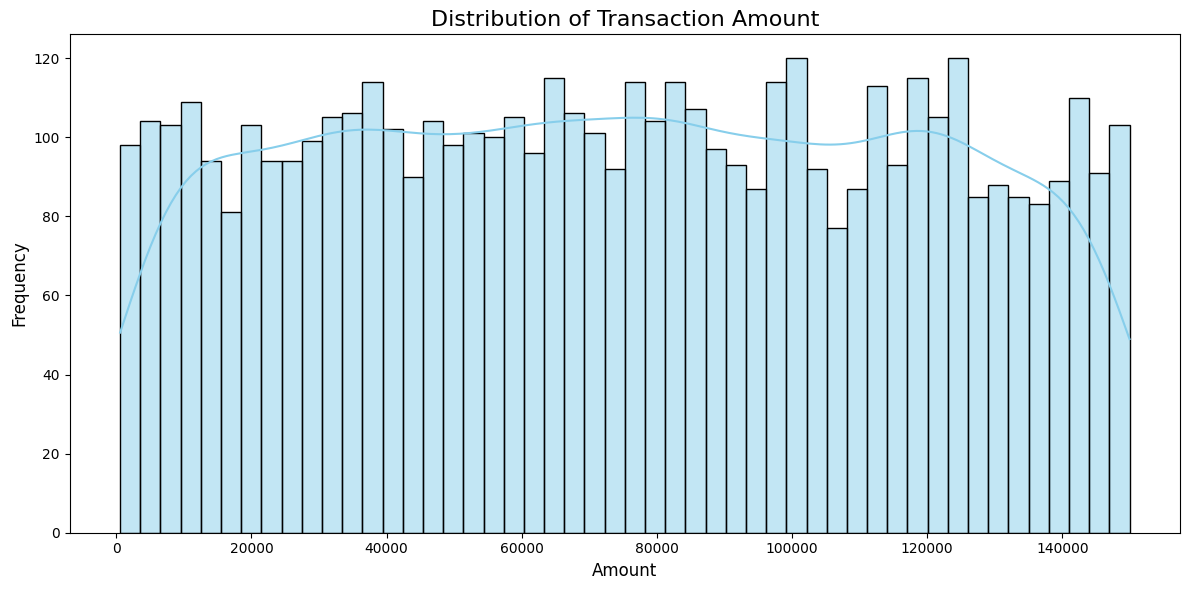

In [ ]:
print(f"\n--- 4. Transaction Amount Distribution ({amount_column_name}) ---")
print(f"\nDescriptive Statistics for {amount_column_name}:")
print(df[amount_column_name].describe().round(2))

plt.figure(figsize=(12, 6))
sns.histplot(df[amount_column_name], bins=50, kde=True, color='skyblue')
plt.title(f'Distribution of Transaction {amount_column_name}', fontsize=16)
plt.xlabel(f'{amount_column_name}', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

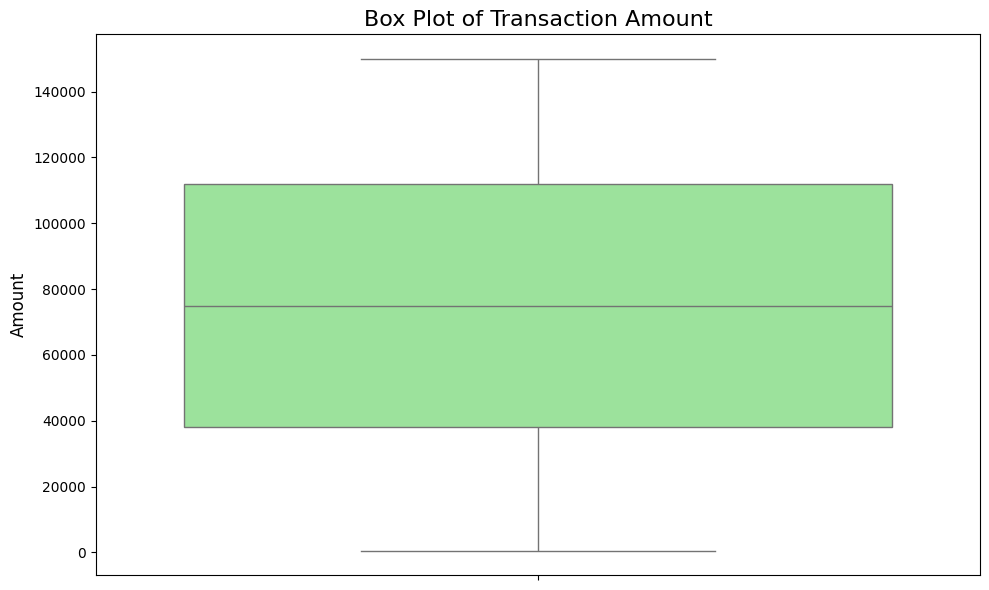

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df[amount_column_name], color='lightgreen')
plt.title(f'Box Plot of Transaction {amount_column_name}', fontsize=16)
plt.ylabel(f'{amount_column_name}', fontsize=12)
plt.tight_layout()
plt.show()



Total Amount per Day of Week:


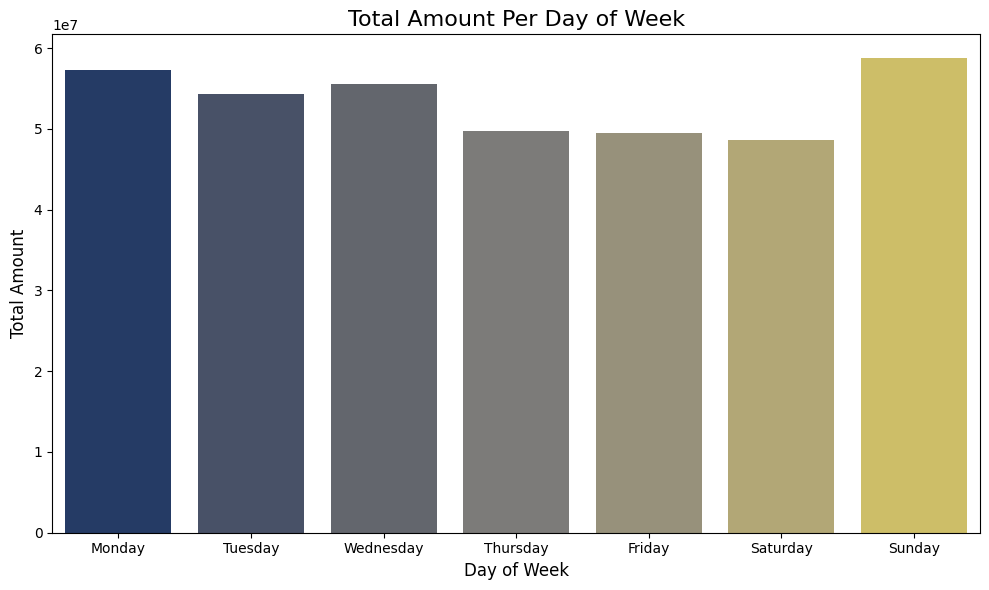

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_amounts = df.groupby('DayOfWeek')[amount_column_name].sum().reindex(day_order, fill_value=0)
print(f"\nTotal {amount_column_name} per Day of Week:")
# print(daily_amounts.round(2))

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_amounts.index, y=daily_amounts.values, palette='cividis', hue=daily_amounts.index, legend=False)
plt.title(f'Total {amount_column_name} Per Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel(f'Total {amount_column_name}', fontsize=12)
plt.tight_layout()
plt.show()


--- 5. Top 10 Merchants/Payees (Merchant) ---


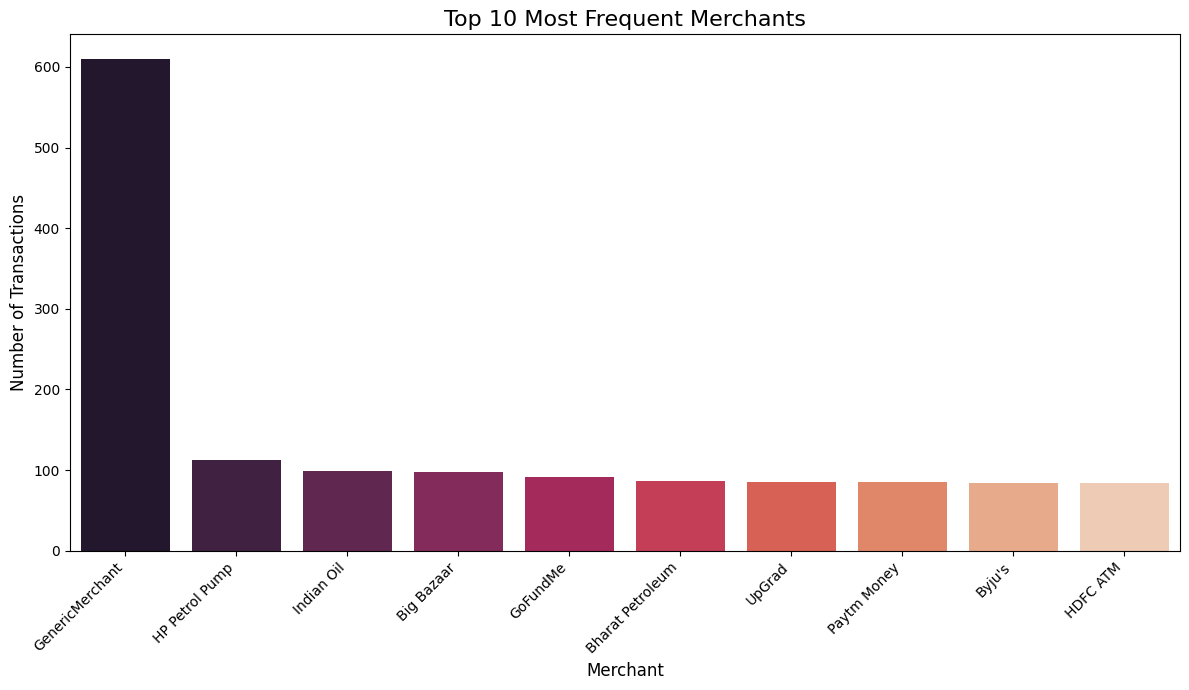

In [ ]:
merchant_column_name="Merchant"
print(f"\n--- 5. Top 10 Merchants/Payees ({merchant_column_name}) ---")
top_merchants = df[merchant_column_name].value_counts().head(10)
# print(top_merchants)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_merchants.index, y=top_merchants.values, hue=top_merchants.index, palette='rocket', legend=False)
plt.title(f'Top 10 Most Frequent {merchant_column_name}s', fontsize=16)
plt.xlabel(f'{merchant_column_name}', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- 6. Total Amount per Category ---


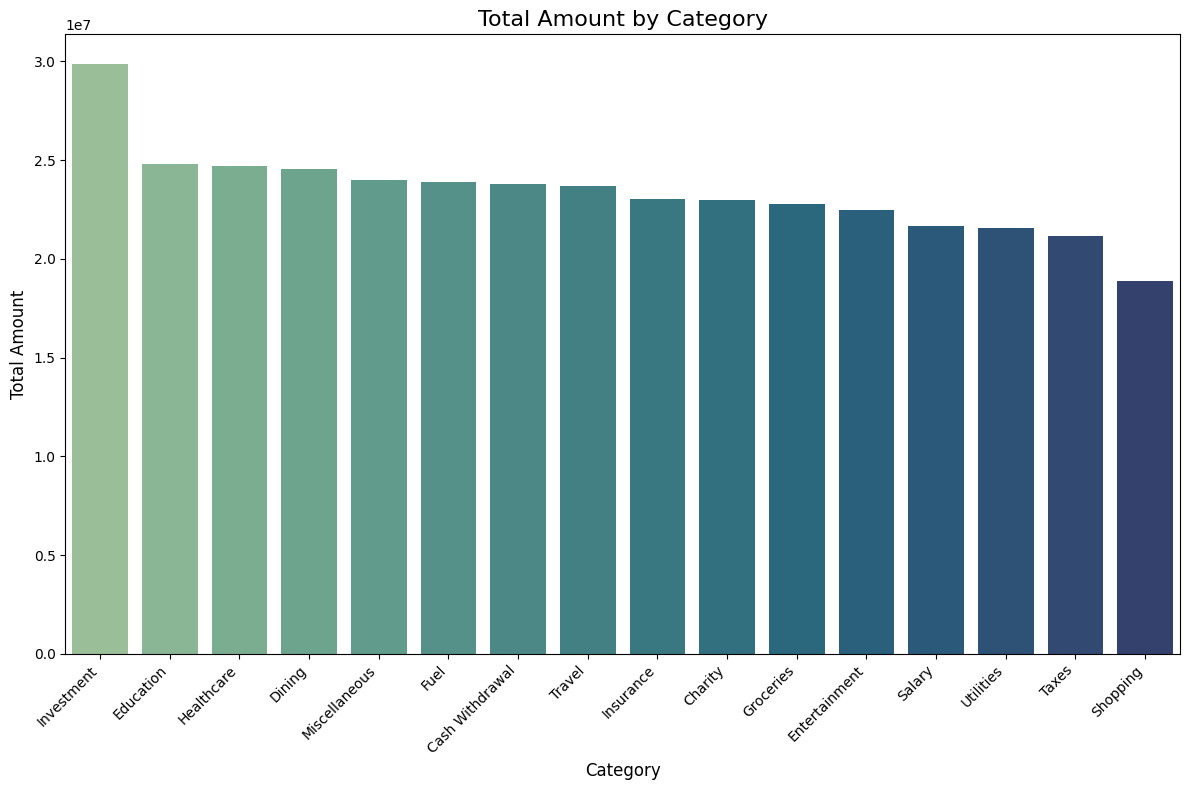

In [ ]:
print(f"\n--- 6. Total {amount_column_name} per Category ---")
category_amounts = df.groupby(category_column_name)[amount_column_name].sum().sort_values(ascending=False)
# print(category_amounts.round(2))

plt.figure(figsize=(12, 8))
sns.barplot(x=category_amounts.index, y=category_amounts.values, palette='crest', hue = category_amounts.index, legend=False)
plt.title(f'Total {amount_column_name} by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel(f'Total {amount_column_name}', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- 7. Text Pattern Analysis (Description) ---


<ipython-input-17-6de0a3bd0598>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=words_df, palette='cubehelix')


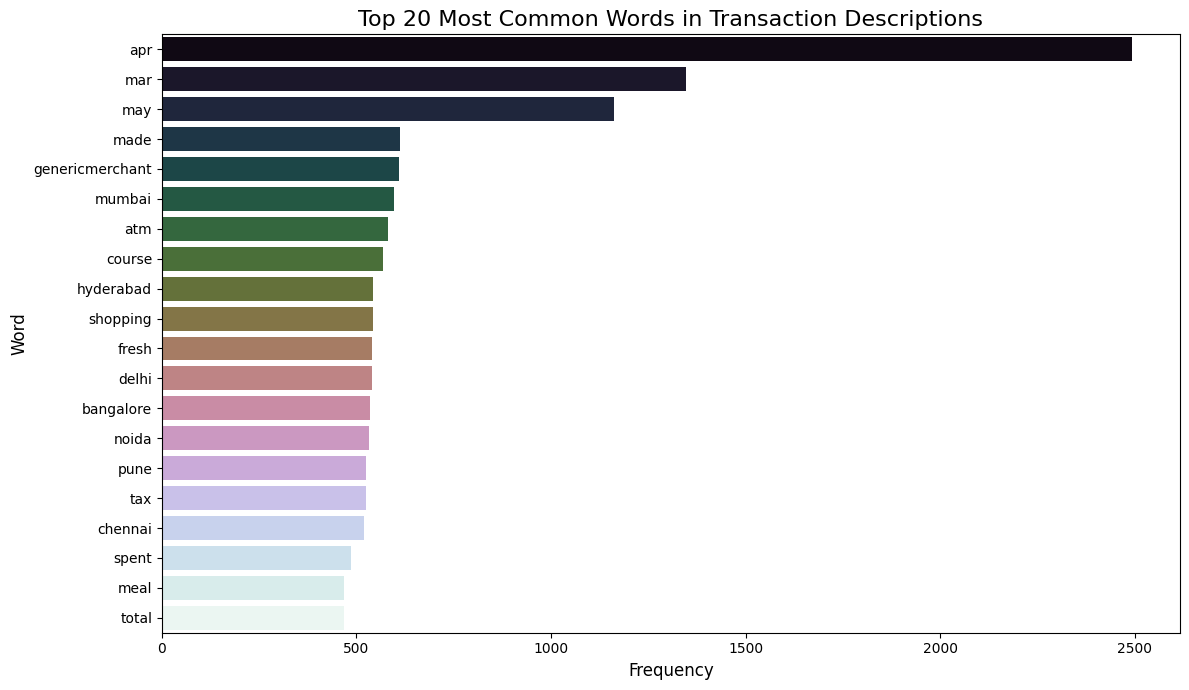

In [ ]:
import re
from nltk.corpus import stopwords

description_columns_name = "Description"
print(f"\n--- 7. Text Pattern Analysis ({description_columns_name}) ---")

# Combine all descriptions into a single string
all_descriptions = ' '.join(df[description_columns_name].dropna().astype(str).tolist())

# Tokenize the text: convert to lowercase, remove punctuation, split into words
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Remove common English stop words
# You might want to add custom stopwords relevant to bank transactions (e.g., 'transaction', 'payment', 'transfer')
custom_stopwords = set(stopwords.words('english'))
# Add some common transaction-related words that might not be useful for categorization
custom_stopwords.update(['transaction', 'payment', 'transfer', 'inc', 'ltd', 'co', 'corp', 'llc', 'pte', 'pvt', 'pvt.', '2025',
                         'inr', 'via', 'paid', 'like'])

filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 1] # Remove single character words

# Get the 20 most common words
common_words = Counter(filtered_words).most_common(20)
# print("\nTop 20 Most Common Words in Transaction Descriptions:")
# for word, count in common_words:
#     print(f"- {word}: {count}")

# Visualize the most common words
if common_words: # Only plot if there are common words
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Frequency', y='Word', data=words_df, palette='cubehelix')
    plt.title('Top 20 Most Common Words in Transaction Descriptions', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.tight_layout()
    plt.show()


7.2. Top 20 Most Common Bigrams (Two-word phrases):


<ipython-input-18-700f97c588f8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette='mako')


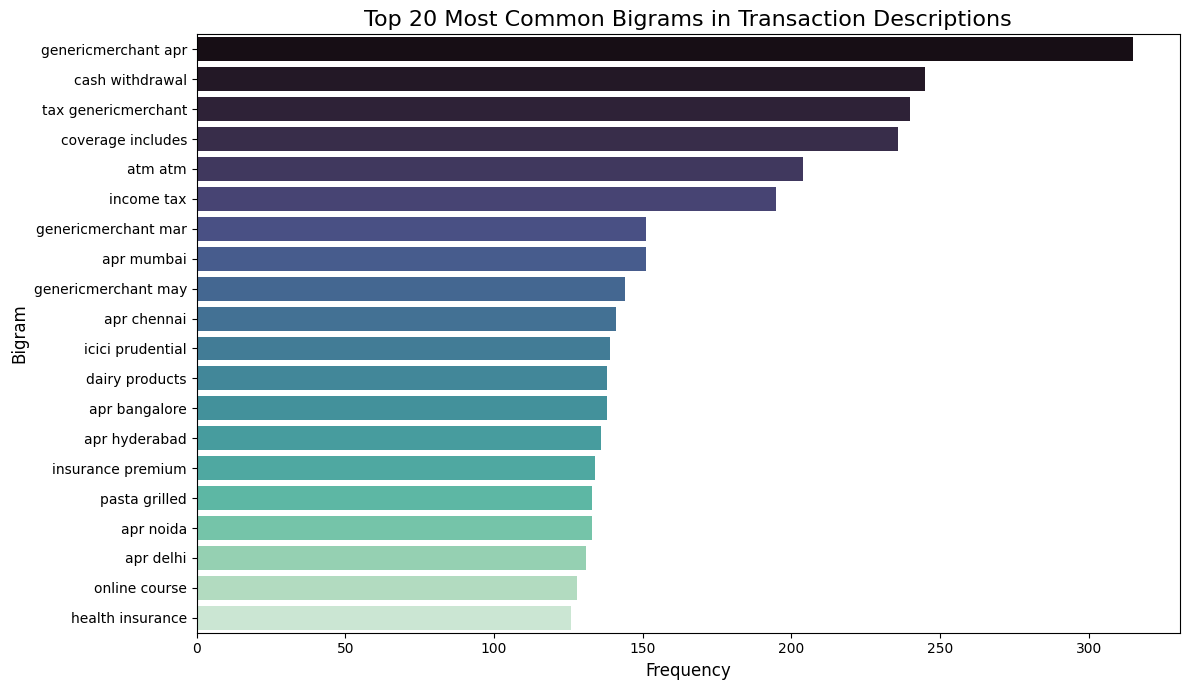

In [ ]:
print("\n7.2. Top 20 Most Common Bigrams (Two-word phrases):")

def preprocess_text(text):
    if pd.isna(text): # Handle NaN values
        return []
    text = str(text).lower()
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 1 and not word.isdigit()] # Added not word.isdigit()
    return filtered_words

df['ProcessedWords'] = df[description_columns_name].apply(preprocess_text)

all_bigrams = []
for word_list in df['ProcessedWords']:
    if len(word_list) > 1: # Ensure there are at least two words to form a bigram
        all_bigrams.extend(list(ngrams(word_list, 2)))

common_bigrams = Counter(all_bigrams).most_common(20)
# Convert bigram tuples to strings for better display
common_bigrams_str = [(" ".join(gram), count) for gram, count in common_bigrams]

if common_bigrams_str:
    bigrams_df = pd.DataFrame(common_bigrams_str, columns=['Bigram', 'Frequency'])
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette='mako')
    plt.title('Top 20 Most Common Bigrams in Transaction Descriptions', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Bigram', fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
print(f"\n7.3. Top 10 Most Common Words Per Category:")
for category in df[category_column_name].unique():
    # Filter descriptions for the current category
    category_descriptions = df[df[category_column_name] == category][description_columns_name].dropna()
    if not category_descriptions.empty:
        # Process text for this category
        category_words = [word for sublist in category_descriptions.apply(preprocess_text) for word in sublist]
        if category_words:
            common_words_in_category = Counter(category_words).most_common(10)
            print(f"\n--- Category: {category} ---")
            for word, count in common_words_in_category:
                print(f"- {word}: {count}")



7.3. Top 10 Most Common Words Per Category:

--- Category: Charity ---
- supporting: 196
- donation: 195
- apr: 157
- made: 131
- gofundme: 91
- mar: 80
- unicef: 77
- may: 76
- giveindia: 73
- cry: 72

--- Category: Fuel ---
- petrol: 410
- liters: 228
- ensuring: 228
- week: 174
- vehicle: 173
- pump: 167
- road: 139
- apr: 135
- filled: 124
- spent: 124

--- Category: Cash Withdrawal ---
- atm: 580
- cash: 245
- withdrawal: 245
- apr: 157
- location: 131
- icici: 112
- may: 81
- mar: 77
- hdfc: 73
- withdrawn: 70

--- Category: Groceries ---
- fresh: 411
- shopping: 265
- dairy: 196
- vegetables: 195
- milk: 191
- products: 179
- apr: 161
- grains: 145
- stocked: 145
- canned: 138

--- Category: Miscellaneous ---
- genericmerchant: 317
- expenses: 193
- miscellaneous: 185
- apr: 164
- small: 163
- items: 148
- service: 138
- covered: 132
- charge: 130
- unexpected: 130

--- Category: Utilities ---
- bill: 165
- apr: 147
- consumption: 111
- mar: 73
- cable: 65
- tv: 65
- subscripti

In [ ]:
df.isna().sum()

,0
Date,0
Amount,0
Merchant,0
Category,0
Description,0
ProcessedWords,0
